In [1]:
pip install -q findspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
import findspark
findspark.init('/home/bigdata/Documents/spark-3.0.0')

In [3]:
import pandas as pd
import numpy as np
from pyspark.sql.session import SparkSession
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SQLContext
from pyspark.sql import DataFrameReader
from pyspark.sql.functions import *
import itertools
from pyspark.ml import Pipeline
from math import sqrt
import sys
import os
from pyspark.sql.types import IntegerType
from pyspark.sql.types import TimestampType
from pyspark.sql.functions import col, column, expr, when, lit
from pyspark.sql.functions import mean, min, max, sum, round, count, datediff, to_date
from pyspark.sql.types import StringType
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import to_timestamp
from pyspark.sql.types import FloatType
from pyspark.sql import functions as F 
from pyspark.sql.functions import *

In [4]:
spark = SparkSession.builder.appName('dataset').getOrCreate()

In [5]:
data = spark.read.format("csv").option("header","True").load("/home/bigdata/store.csv")

In [6]:
data.show()

+---------+---------+--------------------+--------+----------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+----------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|01-12-2010 08:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|01-12-2010 08:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|01-12-2010 08:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|01-12-2010 08:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|01-12-2010 08:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|01-12-2010 08:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|01-1

In [7]:
data.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)



In [8]:
data.count()

541909

In [9]:
data= data.withColumn("Quantity", data["Quantity"].cast(IntegerType()))

In [10]:
data= data.withColumn("UnitPrice", data["UnitPrice"].cast(FloatType()))

In [11]:
data.dropna(how='any')

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, UnitPrice: float, CustomerID: string, Country: string]

In [12]:
data.columns

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [13]:
data.show()

+---------+---------+--------------------+--------+----------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+----------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|01-12-2010 08:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|01-12-2010 08:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|01-12-2010 08:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|01-12-2010 08:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|01-12-2010 08:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|01-12-2010 08:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|01-1

In [14]:
data.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: float (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)



In [15]:
data.select().count()

541909

In [16]:
stock_df = data.select('StockCode').groupBy('StockCode').count().orderBy('count', ascending = False).distinct().show()

+---------+-----+
|StockCode|count|
+---------+-----+
|    22728|  810|
|    21889|  607|
|   90210B|    7|
|    21259|  296|
|    21894|  135|
|    21452|  200|
|    22121|  141|
|    90022|   21|
|    21249|  119|
|    90143|   22|
|    84881|    8|
|    21248|   68|
|    22254|   61|
|    20868|   46|
|    21331|    8|
|   90197B|   27|
|    22596|  274|
|   90026D|    3|
|   90177A|   10|
|   84899F|    1|
+---------+-----+
only showing top 20 rows



In [17]:
Description_df = data.select('Description').groupBy('Description').count().orderBy('count', ascending=False).show()

+--------------------+-----+
|         Description|count|
+--------------------+-----+
|WHITE HANGING HEA...| 2369|
|REGENCY CAKESTAND...| 2200|
|JUMBO BAG RED RET...| 2159|
|       PARTY BUNTING| 1727|
|LUNCH BAG RED RET...| 1638|
|ASSORTED COLOUR B...| 1501|
|SET OF 3 CAKE TIN...| 1473|
|                null| 1454|
|PACK OF 72 RETROS...| 1385|
|LUNCH BAG  BLACK ...| 1350|
|NATURAL SLATE HEA...| 1280|
|             POSTAGE| 1252|
|JUMBO BAG PINK PO...| 1251|
|HEART OF WICKER S...| 1237|
|JAM MAKING SET WI...| 1229|
|JUMBO STORAGE BAG...| 1214|
|PAPER CHAIN KIT 5...| 1210|
|JUMBO SHOPPER VIN...| 1202|
| LUNCH BAG CARS BLUE| 1197|
|LUNCH BAG SPACEBO...| 1192|
+--------------------+-----+
only showing top 20 rows



In [18]:
stockDescription_df = data.select('StockCode').groupBy('StockCode').count().orderBy('count', ascending = False).distinct().show()

+---------+-----+
|StockCode|count|
+---------+-----+
|    22728|  810|
|    21889|  607|
|   90210B|    7|
|    21259|  296|
|    21894|  135|
|    21452|  200|
|    22121|  141|
|    90022|   21|
|    21249|  119|
|    90143|   22|
|    84881|    8|
|    21248|   68|
|    22254|   61|
|    20868|   46|
|    21331|    8|
|   90197B|   27|
|    22596|  274|
|   90026D|    3|
|   90177A|   10|
|   84899F|    1|
+---------+-----+
only showing top 20 rows



In [19]:
customerstock = data.select('CustomerID').groupBy('CustomerID').count().orderBy('count', ascending = False).distinct().show()

+----------+-----+
|CustomerID|count|
+----------+-----+
|     16250|   24|
|     15574|  168|
|     15555|  925|
|     15271|  275|
|     17714|   10|
|     17686|  286|
|     13865|   30|
|     14157|   49|
|     13610|  228|
|     13772|  177|
|     13282|   40|
|     12394|   27|
|     16320|   56|
|     13192|   63|
|     14887|    6|
|     17506|   16|
|     17427|    2|
|     18130|   71|
|     16504|   86|
|     15269|    2|
+----------+-----+
only showing top 20 rows



In [20]:
from pyspark.sql.functions import round

In [21]:
data = data.withColumn('Price_total', round( data.Quantity * data.UnitPrice, 2 ) )

In [22]:
from pyspark.sql import functions as psf

In [23]:
from pyspark.sql.functions import unix_timestamp, from_unixtime
import numpy as np
import datetime
from pyspark.sql.functions import year, month, dayofmonth

In [24]:
from pyspark.sql.functions import to_utc_timestamp, unix_timestamp, lit, datediff, col

In [25]:
data = data.withColumn('InvoiceDate', from_unixtime(unix_timestamp(col('InvoiceDate'), 'dd-MM-yyyy HH:mm'))).alias('date')

In [26]:
data.show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|Price_total|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|     17850|United Kingdom|       15.3|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|     17850|United Kingdom|      20.34|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|     17850|United Kingdom|       22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|     17850|United Kingdom|      20.34|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|     17850|United Kingdom|      20.34|
+---------+---------+-------------------

In [27]:
data= data.withColumn("InvoiceDate", F.col("InvoiceDate").cast("timestamp"))

In [28]:
data.select("InvoiceDate").show()

+-------------------+
|        InvoiceDate|
+-------------------+
|2010-12-01 08:26:00|
|2010-12-01 08:26:00|
|2010-12-01 08:26:00|
|2010-12-01 08:26:00|
|2010-12-01 08:26:00|
|2010-12-01 08:26:00|
|2010-12-01 08:26:00|
|2010-12-01 08:28:00|
|2010-12-01 08:28:00|
|2010-12-01 08:34:00|
|2010-12-01 08:34:00|
|2010-12-01 08:34:00|
|2010-12-01 08:34:00|
|2010-12-01 08:34:00|
|2010-12-01 08:34:00|
|2010-12-01 08:34:00|
|2010-12-01 08:34:00|
|2010-12-01 08:34:00|
|2010-12-01 08:34:00|
|2010-12-01 08:34:00|
+-------------------+
only showing top 20 rows



In [29]:
maxinv = data.select(max('InvoiceDate')).toPandas()

In [30]:
data = data.withColumn('Duration', datediff(lit(maxinv.iloc[0][0]), 'InvoiceDate'))

In [31]:
data.show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----------+--------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|Price_total|Duration|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----------+--------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|     17850|United Kingdom|       15.3|     373|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|     17850|United Kingdom|      20.34|     373|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|     17850|United Kingdom|       22.0|     373|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|     17850|United Kingdom|      20.34|     373|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|     17850|Unite

In [32]:
from pyspark.sql.functions import mean, min, max, sum, count, datediff, to_date

In [33]:
recency =data.groupBy("CustomerID").agg(min("Duration").alias('Recency'))

In [34]:
recency.show()

+----------+-------+
|CustomerID|Recency|
+----------+-------+
|     16250|    261|
|     15574|    177|
|     15555|     12|
|     15271|      7|
|     17714|    320|
|     17686|      7|
|     13865|     58|
|     14157|     19|
|     13610|     12|
|     13772|     33|
|     13282|     18|
|     12394|     63|
|     16320|    172|
|     13192|     95|
|     14887|     79|
|     17506|     70|
|     17427|     71|
|     18130|      8|
|     16504|     25|
|     15269|     23|
+----------+-------+
only showing top 20 rows



In [35]:
custinvoice =data.groupBy("CustomerID", "InvoiceNo").count()

In [36]:
frequency =custinvoice.groupBy('CustomerID').agg(count("*").alias("Frequency"))

In [37]:
frequency.show()

+----------+---------+
|CustomerID|Frequency|
+----------+---------+
|     15555|       20|
|     15574|        4|
|     15634|        1|
|     13610|        9|
|     13192|        2|
|     14157|        3|
|     17686|        7|
|     13865|        4|
|     16250|        2|
|     14204|        1|
|     18130|        4|
|     17427|        1|
|     15271|       16|
|     17714|        1|
|     13282|        6|
|     16320|        2|
|     17506|        2|
|     12394|        2|
|     15269|        1|
|     16504|        1|
+----------+---------+
only showing top 20 rows



In [38]:
monetary = data.groupBy('CustomerID').agg(round(sum('Price_total'), 2).alias('Monetary'))

In [39]:
rf =recency.join(frequency, "CustomerID", how ='inner')

In [40]:
rf.show()

+----------+-------+---------+
|CustomerID|Recency|Frequency|
+----------+-------+---------+
|     12394|     63|        2|
|     12847|     22|        1|
|     13192|     95|        2|
|     13282|     18|        6|
|     13610|     12|        9|
|     13772|     33|        3|
|     13865|     58|        4|
|     14157|     19|        3|
|     14204|      2|        1|
|     14887|     79|        1|
|     15269|     23|        1|
|     15271|      7|       16|
|     15555|     12|       20|
|     15574|    177|        4|
|     15634|     17|        1|
|     16250|    261|        2|
|     16320|    172|        2|
|     16504|     25|        1|
|     17427|     71|        1|
|     17506|     70|        2|
+----------+-------+---------+
only showing top 20 rows



In [41]:
rfm= rf.join(monetary, "CustomerID", how ='inner')

In [42]:
rfm.show()

+----------+-------+---------+--------+
|CustomerID|Recency|Frequency|Monetary|
+----------+-------+---------+--------+
|     12394|     63|        2| 1272.48|
|     12847|     22|        1|  871.54|
|     13192|     95|        2|  911.94|
|     13282|     18|        6| 1047.84|
|     13610|     12|        9| 1115.43|
|     13772|     33|        3| 1132.13|
|     13865|     58|        4|  501.56|
|     14157|     19|        3|  400.43|
|     14204|      2|        1|  161.03|
|     14887|     79|        1|  1862.0|
|     15269|     23|        1|   408.8|
|     15271|      7|       16| 2485.82|
|     15555|     12|       20|  4758.2|
|     15574|    177|        4|  702.25|
|     15634|     17|        1|  243.55|
|     16250|    261|        2|  389.44|
|     16320|    172|        2| 1038.46|
|     16504|     25|        1|  484.38|
|     17427|     71|        1|   100.8|
|     17506|     70|        2|  294.29|
+----------+-------+---------+--------+
only showing top 20 rows



In [43]:
rfm.head(6)

[Row(CustomerID='12394', Recency=63, Frequency=2, Monetary=1272.48),
 Row(CustomerID='12847', Recency=22, Frequency=1, Monetary=871.54),
 Row(CustomerID='13192', Recency=95, Frequency=2, Monetary=911.94),
 Row(CustomerID='13282', Recency=18, Frequency=6, Monetary=1047.84),
 Row(CustomerID='13610', Recency=12, Frequency=9, Monetary=1115.43),
 Row(CustomerID='13772', Recency=33, Frequency=3, Monetary=1132.13)]

In [44]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml. feature import VectorAssembler
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

In [45]:
def changeData(data):
    return data.rdd.map(lambda r: [r[0],Vectors.dense(r[1:])]).toDF(['CustomerID','rfm'])

In [46]:
changed = changeData(rfm)

In [47]:
changed.show()

+----------+-------------------+
|CustomerID|                rfm|
+----------+-------------------+
|     12394| [63.0,2.0,1272.48]|
|     12847|  [22.0,1.0,871.54]|
|     13192|  [95.0,2.0,911.94]|
|     13282| [18.0,6.0,1047.84]|
|     13610| [12.0,9.0,1115.43]|
|     13772| [33.0,3.0,1132.13]|
|     13865|  [58.0,4.0,501.56]|
|     14157|  [19.0,3.0,400.43]|
|     14204|   [2.0,1.0,161.03]|
|     14887|  [79.0,1.0,1862.0]|
|     15269|   [23.0,1.0,408.8]|
|     15271| [7.0,16.0,2485.82]|
|     15555| [12.0,20.0,4758.2]|
|     15574| [177.0,4.0,702.25]|
|     15634|  [17.0,1.0,243.55]|
|     16250| [261.0,2.0,389.44]|
|     16320|[172.0,2.0,1038.46]|
|     16504|  [25.0,1.0,484.38]|
|     17427|   [71.0,1.0,100.8]|
|     17506|  [70.0,2.0,294.29]|
+----------+-------------------+
only showing top 20 rows



In [48]:
from pyspark.ml.feature import StandardScaler

In [49]:
scaler = MinMaxScaler(inputCol= 'rfm', outputCol = 'features')

In [50]:
scaler_model =scaler.fit(changed)
cfinal_data =scaler_model.transform(changed)

In [51]:
cfinal_data.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- rfm: vector (nullable = true)
 |-- features: vector (nullable = true)



In [52]:
cfinal_data.show(5, False)

+----------+------------------+---------------------------------------------------------------+
|CustomerID|rfm               |features                                                       |
+----------+------------------+---------------------------------------------------------------+
|12394     |[63.0,2.0,1272.48]|[0.16890080428954424,0.004048582995951417,0.019593261108692347]|
|12847     |[22.0,1.0,871.54] |[0.058981233243967826,0.0,0.018180389401312613]                |
|13192     |[95.0,2.0,911.94] |[0.2546916890080429,0.004048582995951417,0.018322754884871603] |
|13282     |[18.0,6.0,1047.84]|[0.0482573726541555,0.020242914979757085,0.018801652637734638] |
|13610     |[12.0,9.0,1115.43]|[0.032171581769437,0.032388663967611336,0.019039832910847314]  |
+----------+------------------+---------------------------------------------------------------+
only showing top 5 rows



In [53]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.sql.functions import col, percent_rank, lit
from pyspark.sql.window import Window
from pyspark.sql import DataFrame, Row
from pyspark.sql.types import StructType
from functools import reduce

In [54]:
import numpy as np
import matplotlib.mlab as mlab
import seaborn as sbs
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

In [55]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [56]:
data=np.array(cfinal_data)

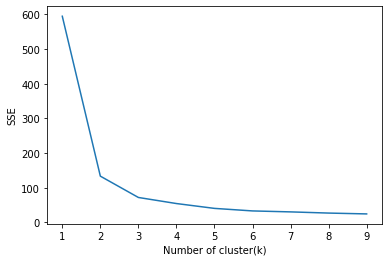

In [57]:
#find optimum k parameter
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster(k)")
plt.ylabel("SSE")
plt.show()

In [58]:
cfinal_data.persist()

DataFrame[CustomerID: string, rfm: vector, features: vector]

In [59]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.sql.functions import col, percent_rank, lit
from pyspark.sql.window import Window
from pyspark.sql import DataFrame, Row
from pyspark.sql.types import StructType
from functools import reduce
from pyspark.ml.clustering import KMeans, KMeansModel

In [60]:
kmeans = KMeans().setK(3).setSeed(1)

In [61]:
model_k = kmeans.fit(cfinal_data)

In [62]:
predictions = model_k.transform(cfinal_data)

In [63]:
predictions.show(5)

+----------+------------------+--------------------+----------+
|CustomerID|               rfm|            features|prediction|
+----------+------------------+--------------------+----------+
|     12394|[63.0,2.0,1272.48]|[0.16890080428954...|         0|
|     12847| [22.0,1.0,871.54]|[0.05898123324396...|         0|
|     13192| [95.0,2.0,911.94]|[0.25469168900804...|         2|
|     13282|[18.0,6.0,1047.84]|[0.04825737265415...|         0|
|     13610|[12.0,9.0,1115.43]|[0.03217158176943...|         0|
+----------+------------------+--------------------+----------+
only showing top 5 rows



In [64]:
predictions.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  634|
|         2|  811|
|         0| 2927|
+----------+-----+



In [65]:
customerK_0 =predictions.filter(predictions['prediction']==0).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     12394|         0|
|     12847|         0|
|     13282|         0|
|     13610|         0|
|     13772|         0|
|     13865|         0|
|     14157|         0|
|     14204|         0|
|     14887|         0|
|     15269|         0|
|     15271|         0|
|     15555|         0|
|     15634|         0|
|     16504|         0|
|     17427|         0|
|     17506|         0|
|     17686|         0|
|     18130|         0|
|     12637|         0|
|     13985|         0|
+----------+----------+
only showing top 20 rows



In [66]:
customerK_1 =predictions.filter(predictions['prediction']==1).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     16250|         1|
|     17714|         1|
|     13187|         1|
|     15052|         1|
|     15448|         1|
|     17551|         1|
|     12811|         1|
|     16619|         1|
|     17438|         1|
|     13133|         1|
|     14439|         1|
|     17128|         1|
|     17718|         1|
|     18106|         1|
|     12386|         1|
|     13672|         1|
|     15107|         1|
|     17507|         1|
|     17855|         1|
|     13512|         1|
+----------+----------+
only showing top 20 rows



In [67]:
customerK_3 =predictions.filter(predictions['prediction']==2).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     13192|         2|
|     15574|         2|
|     16320|         2|
|     12888|         2|
|     17866|         2|
|     12750|         2|
|     13395|         2|
|     14000|         2|
|     14552|         2|
|     15041|         2|
|     16340|         2|
|     17256|         2|
|     12710|         2|
|     12816|         2|
|     13027|         2|
|     13122|         2|
|     14340|         2|
|     14697|         2|
|     16093|         2|
|     17660|         2|
+----------+----------+
only showing top 20 rows



In [68]:
final_result = rfm.join(predictions.select('CustomerID', 'prediction'), 'CustomerID', how='left')

In [69]:
final_result.show()

+----------+-------+---------+--------+----------+
|CustomerID|Recency|Frequency|Monetary|prediction|
+----------+-------+---------+--------+----------+
|     12394|     63|        2| 1272.48|         0|
|     12847|     22|        1|  871.54|         0|
|     13192|     95|        2|  911.94|         2|
|     13282|     18|        6| 1047.84|         0|
|     13610|     12|        9| 1115.43|         0|
|     13772|     33|        3| 1132.13|         0|
|     13865|     58|        4|  501.56|         0|
|     14157|     19|        3|  400.43|         0|
|     14204|      2|        1|  161.03|         0|
|     14887|     79|        1|  1862.0|         0|
|     15269|     23|        1|   408.8|         0|
|     15271|      7|       16| 2485.82|         0|
|     15555|     12|       20|  4758.2|         0|
|     15574|    177|        4|  702.25|         2|
|     15634|     17|        1|  243.55|         0|
|     16250|    261|        2|  389.44|         1|
|     16320|    172|        2| 

In [70]:
final_result.groupBy('prediction').agg({'Recency':'mean','Frequency': 'mean', 'Monetary': 'mean'}).sort(F.col('prediction')).show()

+----------+------------------+-----------------+------------------+
|prediction|      avg(Recency)|    avg(Monetary)|    avg(Frequency)|
+----------+------------------+-----------------+------------------+
|         0|30.674410659378204|2552.377280491972| 6.533993850358729|
|         1|  294.903785488959| 404.903375394322|1.5599369085173502|
|         2| 152.4537607891492|705.9787546239216|2.5598027127003697|
+----------+------------------+-----------------+------------------+



In [71]:
final_result.select('prediction', 'recency', 'monetary', 'frequency').show()

+----------+-------+--------+---------+
|prediction|recency|monetary|frequency|
+----------+-------+--------+---------+
|         0|     63| 1272.48|        2|
|         0|     22|  871.54|        1|
|         2|     95|  911.94|        2|
|         0|     18| 1047.84|        6|
|         0|     12| 1115.43|        9|
|         0|     33| 1132.13|        3|
|         0|     58|  501.56|        4|
|         0|     19|  400.43|        3|
|         0|      2|  161.03|        1|
|         0|     79|  1862.0|        1|
|         0|     23|   408.8|        1|
|         0|      7| 2485.82|       16|
|         0|     12|  4758.2|       20|
|         2|    177|  702.25|        4|
|         0|     17|  243.55|        1|
|         1|    261|  389.44|        2|
|         2|    172| 1038.46|        2|
|         0|     25|  484.38|        1|
|         0|     71|   100.8|        1|
|         0|     70|  294.29|        2|
+----------+-------+--------+---------+
only showing top 20 rows



In [72]:
from pyspark.ml.evaluation import ClusteringEvaluator

In [73]:
evaluator = ClusteringEvaluator()

In [74]:
#Evaluating Clustering by computing within Set Sum of Sqaured Errors

silhouette = evaluator.evaluate(model_k.transform(cfinal_data))

print("Silhoutte with squared euclidean distance = " + str(silhouette))

Silhoutte with squared euclidean distance = 0.8045154385557931


In [75]:
# Shows the result.
centers = model_k.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[0.08223703 0.02240483 0.02410349]
[0.79062677 0.00226695 0.01653601]
[0.40872322 0.00631499 0.01759697]


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

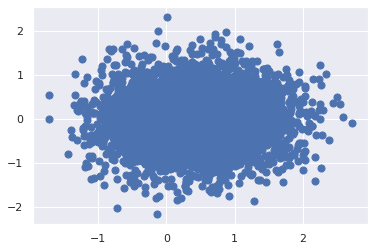

In [77]:
from sklearn.datasets.samples_generator import make_blobs
cfinal_data, labels = make_blobs(n_samples=4372, centers=centers,
                       cluster_std=0.60, random_state=0)
plt.scatter(cfinal_data[:, 0], cfinal_data[:, 1], s=50);

In [78]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(cfinal_data)
y_kmeans = kmeans.predict(cfinal_data)

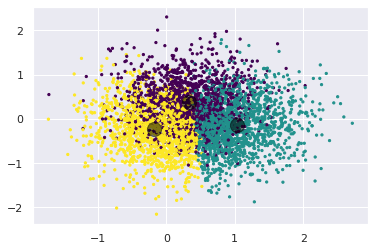

In [79]:
plt.scatter(cfinal_data[:, 0], cfinal_data[:, 1], c=y_kmeans, s=5, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [80]:
#convert prediction to dataframe
pandasDF= predictions.toPandas()

In [81]:
pandasDF

,CustomerID,rfm,features,prediction
0,12394,"[63.0, 2.0, 1272.48]","[0.16890080428954424, 0.004048582995951417, 0....",0
1,12847,"[22.0, 1.0, 871.54]","[0.058981233243967826, 0.0, 0.018180389401312613]",0
2,13192,"[95.0, 2.0, 911.94]","[0.2546916890080429, 0.004048582995951417, 0.0...",2
3,13282,"[18.0, 6.0, 1047.84]","[0.0482573726541555, 0.020242914979757085, 0.0...",0
4,13610,"[12.0, 9.0, 1115.43]","[0.032171581769437, 0.032388663967611336, 0.01...",0
...,...,...,...,...
4367,16751,"[30.0, 1.0, 1764.72]","[0.08042895442359249, 0.0, 0.021327864713322958]",0
4368,16858,"[366.0, 2.0, 345.89]","[0.9812332439678284, 0.004048582995951417, 0.0...",1
4369,17081,"[25.0, 2.0, 290.16]","[0.06702412868632708, 0.004048582995951417, 0....",0
4370,17284,"[60.0, 7.0, 1641.68]","[0.16085790884718498, 0.024291497975708502, 0....",0


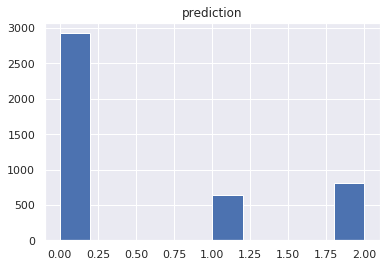

In [82]:
#pandas_testDF interpretation in graphical form suggesting number of cluster point

final_result.select("prediction").toPandas().hist();

In [83]:
final_result.groupBy('recency', 'prediction').count().show()

+-------+----------+-----+
|recency|prediction|count|
+-------+----------+-----+
|     92|         2|   14|
|    192|         2|    8|
|     30|         0|   38|
|     88|         0|   14|
|    205|         2|    5|
|      1|         0|  116|
|    112|         2|    8|
|     71|         0|   28|
|    152|         2|    3|
|    208|         2|    3|
|    200|         2|    5|
|    108|         2|   10|
|    123|         2|    6|
|    243|         1|    4|
|    190|         2|    8|
|    368|         1|    5|
|    154|         2|   11|
|    338|         1|    2|
|    151|         2|   11|
|     54|         0|   11|
+-------+----------+-----+
only showing top 20 rows



In [84]:
final_result = final_result.withColumnRenamed('prediction', 'kpred')

In [85]:
final_result.show()

+----------+-------+---------+--------+-----+
|CustomerID|Recency|Frequency|Monetary|kpred|
+----------+-------+---------+--------+-----+
|     12394|     63|        2| 1272.48|    0|
|     12847|     22|        1|  871.54|    0|
|     13192|     95|        2|  911.94|    2|
|     13282|     18|        6| 1047.84|    0|
|     13610|     12|        9| 1115.43|    0|
|     13772|     33|        3| 1132.13|    0|
|     13865|     58|        4|  501.56|    0|
|     14157|     19|        3|  400.43|    0|
|     14204|      2|        1|  161.03|    0|
|     14887|     79|        1|  1862.0|    0|
|     15269|     23|        1|   408.8|    0|
|     15271|      7|       16| 2485.82|    0|
|     15555|     12|       20|  4758.2|    0|
|     15574|    177|        4|  702.25|    2|
|     15634|     17|        1|  243.55|    0|
|     16250|    261|        2|  389.44|    1|
|     16320|    172|        2| 1038.46|    2|
|     16504|     25|        1|  484.38|    0|
|     17427|     71|        1|   1

In [86]:
cols =final_result.columns

In [87]:
from pyspark.ml.feature import(VectorAssembler, VectorIndexer, OneHotEncoder, StringIndexer)

from pyspark.ml import Pipeline

In [88]:
#convert string to numeric value
netColumns = ['CustomerID']

stages = []

indexers=[StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol+"_index").fit(final_result) for categoricalCol in netColumns]

In [89]:
#display(indexers)
pipeline = Pipeline(stages=indexers)

df_schemas= pipeline.fit(final_result).transform(final_result)

In [90]:
df_schemas.show()

+----------+-------+---------+--------+-----+----------------+
|CustomerID|Recency|Frequency|Monetary|kpred|CustomerID_index|
+----------+-------+---------+--------+-----+----------------+
|     12394|     63|        2| 1272.48|    0|            38.0|
|     12847|     22|        1|  871.54|    0|           400.0|
|     13192|     95|        2|  911.94|    2|           647.0|
|     13282|     18|        6| 1047.84|    0|           713.0|
|     13610|     12|        9| 1115.43|    0|           949.0|
|     13772|     33|        3| 1132.13|    0|          1065.0|
|     13865|     58|        4|  501.56|    0|          1130.0|
|     14157|     19|        3|  400.43|    0|          1346.0|
|     14204|      2|        1|  161.03|    0|          1376.0|
|     14887|     79|        1|  1862.0|    0|          1876.0|
|     15269|     23|        1|   408.8|    0|          2163.0|
|     15271|      7|       16| 2485.82|    0|          2165.0|
|     15555|     12|       20|  4758.2|    0|          

In [91]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

netColumns = ['CustomerID']

stages = []

for categoricalCol in netColumns:
    
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    
    stages += [stringIndexer, encoder]
    
    label_stringIdx = StringIndexer(inputCol = 'kpred', outputCol = 'label')
    
stages += [label_stringIdx]

numericCols = ['Recency', 'Frequency', 'Monetary']


assemblerInputs = [c + "classVec" for c in netColumns] + numericCols

assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

stages += [assembler]

In [92]:
# pipeline
from pyspark.ml import Pipeline

pipeline = Pipeline(stages = stages)

In [93]:
pipelineModel = pipeline.fit(final_result)

In [94]:
df = pipelineModel.transform(final_result)

selectedCols = ['label', 'features'] + cols

In [95]:
df = df.select(selectedCols)

df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Recency: integer (nullable = true)
 |-- Frequency: long (nullable = false)
 |-- Monetary: double (nullable = true)
 |-- kpred: integer (nullable = true)



In [96]:
import pandas as pd

In [97]:
#show classification by label
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
label,0,0,1,0,0
features,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
CustomerID,12394,12847,13192,13282,13610
Recency,63,22,95,18,12
Frequency,2,1,2,6,9
Monetary,1272.48,871.54,911.94,1047.84,1115.43
kpred,0,0,2,0,0


In [98]:
train_data, test_data = df.randomSplit([0.7, 0.3], seed = 2018)

In [99]:
#show test and train data count
print("Training Dataset Count: " + str(train_data.count()))

print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 3064
Test Dataset Count: 1308


In [100]:
from pyspark.ml.classification import DecisionTreeClassifier


dtc = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 20)

In [101]:
dtModel = dtc.fit(train_data)

In [102]:
#count numNodes
print("Number of Node: " , dtModel.numNodes)

Number of Node:  111


In [103]:
#count depth
print("Number of depth: ", dtModel.depth)

Number of depth:  20


In [104]:
predictions = dtModel.transform(test_data)

In [105]:
predictions.select("prediction", "CustomerID","kpred", "label").distinct().collect()

[Row(prediction=0.0, CustomerID='12394', kpred=0, label=0.0),
 Row(prediction=0.0, CustomerID='14887', kpred=0, label=0.0),
 Row(prediction=0.0, CustomerID='15555', kpred=0, label=0.0),
 Row(prediction=0.0, CustomerID='15634', kpred=0, label=0.0),
 Row(prediction=0.0, CustomerID='17686', kpred=0, label=0.0),
 Row(prediction=1.0, CustomerID='15574', kpred=2, label=1.0),
 Row(prediction=0.0, CustomerID='12637', kpred=0, label=0.0),
 Row(prediction=0.0, CustomerID='14974', kpred=0, label=0.0),
 Row(prediction=0.0, CustomerID='16639', kpred=0, label=0.0),
 Row(prediction=2.0, CustomerID='13187', kpred=1, label=2.0),
 Row(prediction=2.0, CustomerID='17551', kpred=1, label=2.0),
 Row(prediction=0.0, CustomerID='16303', kpred=0, label=0.0),
 Row(prediction=0.0, CustomerID='17901', kpred=0, label=0.0),
 Row(prediction=0.0, CustomerID='18276', kpred=0, label=0.0),
 Row(prediction=1.0, CustomerID='12750', kpred=2, label=1.0),
 Row(prediction=1.0, CustomerID='13395', kpred=2, label=1.0),
 Row(pre

In [106]:
predictions.select('label',  'prediction','rawPrediction' , 'probability').show(10)

+-----+----------+----------------+-------------+
|label|prediction|   rawPrediction|  probability|
+-----+----------+----------------+-------------+
|  0.0|       0.0|[2018.0,0.0,0.0]|[1.0,0.0,0.0]|
|  0.0|       0.0|[2018.0,0.0,0.0]|[1.0,0.0,0.0]|
|  0.0|       0.0|[2018.0,0.0,0.0]|[1.0,0.0,0.0]|
|  0.0|       0.0|[2018.0,0.0,0.0]|[1.0,0.0,0.0]|
|  0.0|       0.0|[2018.0,0.0,0.0]|[1.0,0.0,0.0]|
|  1.0|       1.0| [0.0,480.0,0.0]|[0.0,1.0,0.0]|
|  0.0|       0.0|[2018.0,0.0,0.0]|[1.0,0.0,0.0]|
|  0.0|       0.0|[2018.0,0.0,0.0]|[1.0,0.0,0.0]|
|  0.0|       0.0|[2018.0,0.0,0.0]|[1.0,0.0,0.0]|
|  2.0|       2.0| [0.0,0.0,383.0]|[0.0,0.0,1.0]|
+-----+----------+----------------+-------------+
only showing top 10 rows



In [107]:
grouped = predictions.groupBy("label", "prediction").count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|  237|
|  0.0|       1.0|   13|
|  2.0|       2.0|  178|
|  1.0|       0.0|    2|
|  2.0|       1.0|    4|
|  1.0|       2.0|   12|
|  0.0|       0.0|  862|
+-----+----------+-----+



In [108]:
customerd_0 =predictions.filter(predictions['prediction']==0).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     12394|       0.0|
|     14887|       0.0|
|     15555|       0.0|
|     15634|       0.0|
|     17686|       0.0|
|     12637|       0.0|
|     14974|       0.0|
|     16639|       0.0|
|     16303|       0.0|
|     17901|       0.0|
|     18276|       0.0|
|     13805|       0.0|
|     14649|       0.0|
|     15277|       0.0|
|     15433|       0.0|
|     17584|       0.0|
|     13429|       0.0|
|     13700|       0.0|
|     15553|       0.0|
|     16133|       0.0|
+----------+----------+
only showing top 20 rows



In [109]:
customerd_1 =predictions.filter(predictions['prediction']==1).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     15574|       1.0|
|     12750|       1.0|
|     13395|       1.0|
|     15041|       1.0|
|     16340|       1.0|
|     17375|       1.0|
|     12643|       1.0|
|     15412|       1.0|
|     16503|       1.0|
|     15895|       1.0|
|     17900|       1.0|
|     13937|       1.0|
|     13952|       1.0|
|     15802|       1.0|
|     18248|       1.0|
|     12756|       1.0|
|     13821|       1.0|
|     14722|       1.0|
|     15071|       1.0|
|     13833|       1.0|
+----------+----------+
only showing top 20 rows



In [110]:
customerd_2 =predictions.filter(predictions['prediction']==2).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     13187|       2.0|
|     17551|       2.0|
|     12811|       2.0|
|     14340|       2.0|
|     18106|       2.0|
|     12386|       2.0|
|     15107|       2.0|
|     17507|       2.0|
|     13512|       2.0|
|     14114|       2.0|
|     17946|       2.0|
|     13065|       2.0|
|     17303|       2.0|
|     16097|       2.0|
|     14090|       2.0|
|     15047|       2.0|
|     15388|       2.0|
|     15353|       2.0|
|     14476|       2.0|
|     17535|       2.0|
+----------+----------+
only showing top 20 rows



In [111]:
print(dtModel.toDebugString)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_d63b55ae8edd, depth=20, numNodes=111, numClasses=3, numFeatures=4374
  If (feature 4371 <= 85.5)
   Predict: 0.0
  Else (feature 4371 > 85.5)
   If (feature 4371 <= 216.0)
    If (feature 4371 <= 99.5)
     If (feature 4372 <= 6.5)
      If (feature 4372 <= 3.5)
       If (feature 4373 <= 1265.46)
        If (feature 4372 <= 1.5)
         If (feature 4373 <= 220.77499999999998)
          If (feature 1141 in {0.0})
           If (feature 3411 in {0.0})
            If (feature 4349 in {0.0})
             Predict: 1.0
            Else (feature 4349 not in {0.0})
             Predict: 0.0
           Else (feature 3411 not in {0.0})
            Predict: 0.0
          Else (feature 1141 not in {0.0})
           Predict: 0.0
         Else (feature 4373 > 220.77499999999998)
          If (feature 4373 <= 297.03499999999997)
           Predict: 0.0
          Else (feature 4373 > 297.03499999999997)
           If (feature 4373 <= 541.04

In [112]:
#show features based on importance
dtModel.featureImportances

SparseVector(4374, {54: 0.0011, 128: 0.0006, 153: 0.0007, 538: 0.0005, 592: 0.001, 658: 0.0006, 950: 0.0011, 1028: 0.0006, 1121: 0.0011, 1141: 0.0008, 1355: 0.0008, 1431: 0.0012, 1451: 0.0007, 1535: 0.0008, 1594: 0.0008, 1689: 0.0008, 1714: 0.0009, 1740: 0.0008, 2134: 0.001, 2324: 0.0011, 2372: 0.0008, 2434: 0.001, 2461: 0.0009, 2531: 0.0009, 2727: 0.0011, 2741: 0.0009, 2874: 0.001, 2927: 0.0011, 2934: 0.0012, 2997: 0.0011, 3042: 0.001, 3167: 0.0011, 3411: 0.0009, 3433: 0.0012, 3460: 0.0013, 3699: 0.0013, 3871: 0.0012, 4321: 0.0013, 4349: 0.0012, 4371: 0.9477, 4372: 0.0061, 4373: 0.009})

In [113]:
#Evaluate our Decision Tree model.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [114]:
#show accuracy of decision Tree model
evaluator = MulticlassClassificationEvaluator()

accuracy=evaluator.evaluate(predictions)

In [115]:
accuracy

0.9764653525692616

In [116]:
print('F1-Score ', evaluator.evaluate(predictions, 
                                      {evaluator.metricName: 'f1'}))
print('Precision ', evaluator.evaluate(predictions,
                                       {evaluator.metricName: 'weightedPrecision'}))
print('Recall ', evaluator.evaluate(predictions, 
                                    {evaluator.metricName: 'weightedRecall'}))
print('Accuracy ', evaluator.evaluate(predictions, 
                                      {evaluator.metricName: 'accuracy'}))

F1-Score  0.9764653525692616
Precision  0.9768200210982467
Recall  0.9762996941896024
Accuracy  0.9762996941896025


In [117]:
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [118]:
#Convert Spark-DataFrame to Pnadas-DataFrame
#Call Confusion Matrix With 'True' and 'Predicted' Label

from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas() # convert to pandas dataframe from spark dataframe

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas() # convert to pandas dataframe from spark dataframe

cnf_matrix = confusion_matrix(y_true, y_pred,labels=range(3))

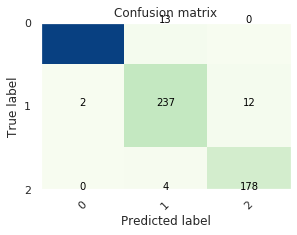

In [119]:
#Visualize the 'Confusion Matrix' 

import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.grid(False)

# call pre defined function
plot_confusion_matrix(cnf_matrix, classes=range(3))

In [120]:
#Classification Report of each class group

from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       1.00      0.99      0.99       875
     Class 1       0.93      0.94      0.94       251
     Class 2       0.94      0.98      0.96       182

    accuracy                           0.98      1308
   macro avg       0.96      0.97      0.96      1308
weighted avg       0.98      0.98      0.98      1308



In [121]:
predictions.rdd.take(2)

[Row(label=0.0, features=SparseVector(4374, {38: 1.0, 4371: 63.0, 4372: 2.0, 4373: 1272.48}), CustomerID='12394', Recency=63, Frequency=2, Monetary=1272.48, kpred=0, rawPrediction=DenseVector([2018.0, 0.0, 0.0]), probability=DenseVector([1.0, 0.0, 0.0]), prediction=0.0),
 Row(label=0.0, features=SparseVector(4374, {1876: 1.0, 4371: 79.0, 4372: 1.0, 4373: 1862.0}), CustomerID='14887', Recency=79, Frequency=1, Monetary=1862.0, kpred=0, rawPrediction=DenseVector([2018.0, 0.0, 0.0]), probability=DenseVector([1.0, 0.0, 0.0]), prediction=0.0)]

In [122]:
#confusion metrix
predictions.rdd.map(tuple).take(2)

[(0.0,
  SparseVector(4374, {38: 1.0, 4371: 63.0, 4372: 2.0, 4373: 1272.48}),
  '12394',
  63,
  2,
  1272.48,
  0,
  DenseVector([2018.0, 0.0, 0.0]),
  DenseVector([1.0, 0.0, 0.0]),
  0.0),
 (0.0,
  SparseVector(4374, {1876: 1.0, 4371: 79.0, 4372: 1.0, 4373: 1862.0}),
  '14887',
  79,
  1,
  1862.0,
  0,
  DenseVector([2018.0, 0.0, 0.0]),
  DenseVector([1.0, 0.0, 0.0]),
  0.0)]

In [123]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [124]:
labelandprediction = predictions.select("prediction", "label")

In [125]:
metrics = MulticlassMetrics(labelandprediction.rdd.map(tuple))

In [126]:
precision = metrics.precision(0)
recall = metrics.recall(0)
print("Precision = %s" % precision)
print("Recall = %s" % recall)


Precision = 0.9976851851851852
Recall = 0.9851428571428571


In [127]:
metrics.confusionMatrix().toArray().transpose()

array([[862.,   2.,   0.],
       [ 13., 237.,   4.],
       [  0.,  12., 178.]])

In [128]:
#RandomForest
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')

In [129]:
rfModel = rf.fit(train_data)

predictions = rfModel.transform(test_data)

In [130]:
predictions.select('CustomerID','label', 'features', 'prediction', 'probability').show(10)

+----------+-----+--------------------+----------+--------------------+
|CustomerID|label|            features|prediction|         probability|
+----------+-----+--------------------+----------+--------------------+
|     12394|  0.0|(4374,[38,4371,43...|       0.0|[0.73075120868186...|
|     14887|  0.0|(4374,[1876,4371,...|       0.0|[0.73075120868186...|
|     15555|  0.0|(4374,[2375,4371,...|       0.0|[0.74925675444215...|
|     15634|  0.0|(4374,[2433,4371,...|       0.0|[0.69424531824831...|
|     17686|  0.0|(4374,[3934,4371,...|       0.0|[0.74925675444215...|
|     15574|  1.0|(4374,[2389,4371,...|       0.0|[0.60491165567412...|
|     12637|  0.0|(4374,[238,4371,4...|       0.0|[0.74925675444215...|
|     14974|  0.0|(4374,[1938,4371,...|       0.0|[0.69424531824831...|
|     16639|  0.0|(4374,[3170,4371,...|       0.0|[0.74925675444215...|
|     13187|  2.0|(4374,[644,4371,4...|       0.0|[0.54990021948028...|
+----------+-----+--------------------+----------+--------------

In [131]:
predictions.select('CustomerID','label','prediction').show(10)

+----------+-----+----------+
|CustomerID|label|prediction|
+----------+-----+----------+
|     12394|  0.0|       0.0|
|     14887|  0.0|       0.0|
|     15555|  0.0|       0.0|
|     15634|  0.0|       0.0|
|     17686|  0.0|       0.0|
|     15574|  1.0|       0.0|
|     12637|  0.0|       0.0|
|     14974|  0.0|       0.0|
|     16639|  0.0|       0.0|
|     13187|  2.0|       0.0|
+----------+-----+----------+
only showing top 10 rows



In [132]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [133]:
evaluator = MulticlassClassificationEvaluator()

In [134]:
#show accuracy of randomforest model
accuracy=evaluator.evaluate(predictions)

accuracy

0.5362713825627836

In [135]:
predictions.groupBy("label", "prediction").count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  2.0|       0.0|  182|
|  1.0|       0.0|  251|
|  0.0|       0.0|  875|
+-----+----------+-----+



In [136]:
customerr_0 =predictions.filter(predictions['prediction']==0).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     12394|       0.0|
|     14887|       0.0|
|     15555|       0.0|
|     15634|       0.0|
|     17686|       0.0|
|     15574|       0.0|
|     12637|       0.0|
|     14974|       0.0|
|     16639|       0.0|
|     13187|       0.0|
|     17551|       0.0|
|     16303|       0.0|
|     17901|       0.0|
|     18276|       0.0|
|     12750|       0.0|
|     13395|       0.0|
|     15041|       0.0|
|     16340|       0.0|
|     12811|       0.0|
|     13805|       0.0|
+----------+----------+
only showing top 20 rows



In [137]:
customerr_1 =predictions.filter(predictions['prediction']==1).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
+----------+----------+



In [138]:
customerr_2 =predictions.filter(predictions['prediction']==2).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
+----------+----------+



In [139]:
print('F1-Score ', evaluator.evaluate(predictions, 
                                      {evaluator.metricName: 'f1'}))
print('Precision ', evaluator.evaluate(predictions,
                                       {evaluator.metricName: 'weightedPrecision'}))
print('Recall ', evaluator.evaluate(predictions, 
                                    {evaluator.metricName: 'weightedRecall'}))
print('Accuracy ', evaluator.evaluate(predictions, 
                                      {evaluator.metricName: 'accuracy'}))

F1-Score  0.5362713825627836
Precision  0.4475078089199376
Recall  0.668960244648318
Accuracy  0.668960244648318


In [140]:
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [141]:
from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas() # convert to pandas dataframe from spark dataframe

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas() # convert to pandas dataframe from spark dataframe

cnf_matrix = confusion_matrix(y_true, y_pred,labels=range(3))

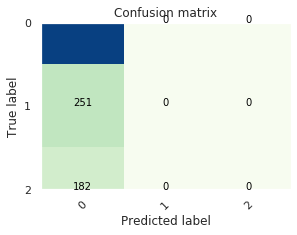

In [142]:
#Visualize the 'Confusion Matrix' 

import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.grid(False)

# call pre defined function
plot_confusion_matrix(cnf_matrix, classes=range(3))

In [143]:
#Classification Report of each class group

from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.67      1.00      0.80       875
     Class 1       0.00      0.00      0.00       251
     Class 2       0.00      0.00      0.00       182

    accuracy                           0.67      1308
   macro avg       0.22      0.33      0.27      1308
weighted avg       0.45      0.67      0.54      1308



/home/bigdata/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
#confusion metrix
predictions.rdd.take(2)

[Row(label=0.0, features=SparseVector(4374, {38: 1.0, 4371: 63.0, 4372: 2.0, 4373: 1272.48}), CustomerID='12394', Recency=63, Frequency=2, Monetary=1272.48, kpred=0, rawPrediction=DenseVector([14.615, 3.0308, 2.3542]), probability=DenseVector([0.7308, 0.1515, 0.1177]), prediction=0.0),
 Row(label=0.0, features=SparseVector(4374, {1876: 1.0, 4371: 79.0, 4372: 1.0, 4373: 1862.0}), CustomerID='14887', Recency=79, Frequency=1, Monetary=1862.0, kpred=0, rawPrediction=DenseVector([14.615, 3.0308, 2.3542]), probability=DenseVector([0.7308, 0.1515, 0.1177]), prediction=0.0)]

In [145]:
#confusion metrix
predictions.rdd.map(tuple).take(2)

[(0.0,
  SparseVector(4374, {38: 1.0, 4371: 63.0, 4372: 2.0, 4373: 1272.48}),
  '12394',
  63,
  2,
  1272.48,
  0,
  DenseVector([14.615, 3.0308, 2.3542]),
  DenseVector([0.7308, 0.1515, 0.1177]),
  0.0),
 (0.0,
  SparseVector(4374, {1876: 1.0, 4371: 79.0, 4372: 1.0, 4373: 1862.0}),
  '14887',
  79,
  1,
  1862.0,
  0,
  DenseVector([14.615, 3.0308, 2.3542]),
  DenseVector([0.7308, 0.1515, 0.1177]),
  0.0)]

In [146]:
metrics = MulticlassMetrics(predictions.rdd.map(tuple))

In [147]:
labelandprediction = predictions.select("prediction", "label")
metrics = MulticlassMetrics(labelandprediction.rdd.map(tuple))

In [148]:
precision = metrics.precision(0)
recall = metrics.recall(0)
print("Precision = %s" % precision)
print("Recall = %s" % recall)

Precision = 0.668960244648318
Recall = 1.0


In [149]:
metrics.confusionMatrix().toArray().transpose()

array([[875., 251., 182.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.]])

In [150]:
#show importantfeatures in random forest

rfModel.featureImportances

SparseVector(4374, {162: 0.0001, 182: 0.0034, 240: 0.0125, 253: 0.013, 321: 0.0126, 322: 0.0053, 339: 0.0089, 372: 0.0085, 374: 0.0073, 388: 0.0011, 399: 0.0097, 418: 0.0001, 451: 0.0103, 469: 0.0037, 508: 0.0006, 525: 0.0146, 565: 0.0016, 594: 0.0009, 601: 0.0083, 696: 0.011, 754: 0.0058, 789: 0.0136, 860: 0.001, 1013: 0.0137, 1015: 0.009, 1021: 0.009, 1068: 0.0217, 1091: 0.0014, 1124: 0.0091, 1191: 0.0084, 1262: 0.0106, 1334: 0.0001, 1378: 0.0096, 1394: 0.0001, 1399: 0.0119, 1413: 0.0136, 1511: 0.0099, 1578: 0.0046, 1590: 0.0077, 1663: 0.0104, 1879: 0.0097, 1929: 0.0063, 1946: 0.0001, 1992: 0.0063, 2062: 0.0083, 2080: 0.0065, 2132: 0.0091, 2144: 0.0002, 2204: 0.0126, 2264: 0.0063, 2317: 0.0008, 2399: 0.0005, 2416: 0.0002, 2461: 0.0116, 2570: 0.0009, 2599: 0.0106, 2620: 0.0095, 2724: 0.0174, 2727: 0.0001, 2741: 0.0005, 2752: 0.0073, 2755: 0.0105, 2763: 0.0121, 2808: 0.0174, 2815: 0.0125, 2836: 0.0066, 2873: 0.0013, 2947: 0.0117, 3108: 0.0008, 3167: 0.0118, 3187: 0.0008, 3230: 0.018, 3

In [151]:
from pyspark.ml.classification import LogisticRegression

In [152]:
log_reg = LogisticRegression(featuresCol = 'features', labelCol = 'label')

In [153]:
dtModel_lr = log_reg.fit(train_data)

In [154]:
result =dtModel_lr.transform(test_data)

In [155]:
result.select("CustomerID", "label", "prediction").show()

+----------+-----+----------+
|CustomerID|label|prediction|
+----------+-----+----------+
|     12394|  0.0|       0.0|
|     14887|  0.0|       0.0|
|     15555|  0.0|       0.0|
|     15634|  0.0|       0.0|
|     17686|  0.0|       0.0|
|     15574|  1.0|       0.0|
|     12637|  0.0|       0.0|
|     14974|  0.0|       0.0|
|     16639|  0.0|       0.0|
|     13187|  2.0|       2.0|
|     17551|  2.0|       2.0|
|     16303|  0.0|       0.0|
|     17901|  0.0|       0.0|
|     18276|  0.0|       0.0|
|     12750|  1.0|       0.0|
|     13395|  1.0|       0.0|
|     15041|  1.0|       0.0|
|     16340|  1.0|       0.0|
|     12811|  2.0|       0.0|
|     13805|  0.0|       0.0|
+----------+-----+----------+
only showing top 20 rows



In [156]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [157]:
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol = 'label', metricName= "accuracy")

In [158]:
evaluator.getMetricName()

'accuracy'

In [159]:
accuracy = evaluator.evaluate(result)

In [160]:
accuracy

0.7240061162079511

In [161]:
result.groupBy("label", "prediction").count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  2.0|       0.0|  110|
|  1.0|       0.0|  251|
|  2.0|       2.0|   72|
|  0.0|       0.0|  875|
+-----+----------+-----+



In [162]:
customerl_0 =result.filter(result['prediction']==0).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     12394|       0.0|
|     14887|       0.0|
|     15555|       0.0|
|     15634|       0.0|
|     17686|       0.0|
|     15574|       0.0|
|     12637|       0.0|
|     14974|       0.0|
|     16639|       0.0|
|     16303|       0.0|
|     17901|       0.0|
|     18276|       0.0|
|     12750|       0.0|
|     13395|       0.0|
|     15041|       0.0|
|     16340|       0.0|
|     12811|       0.0|
|     13805|       0.0|
|     14649|       0.0|
|     15277|       0.0|
+----------+----------+
only showing top 20 rows



In [163]:
customerl_1 =result.filter(result['prediction']==1).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
+----------+----------+



In [164]:
customerl_2 =result.filter(result['prediction']==2).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     13187|       2.0|
|     17551|       2.0|
|     18106|       2.0|
|     12386|       2.0|
|     13065|       2.0|
|     17303|       2.0|
|     14090|       2.0|
|     17976|       2.0|
|     12738|       2.0|
|     15880|       2.0|
|     15945|       2.0|
|     12666|       2.0|
|     16754|       2.0|
|     15204|       2.0|
|     15279|       2.0|
|     15460|       2.0|
|     14549|       2.0|
|     17643|       2.0|
|     13584|       2.0|
|     17239|       2.0|
+----------+----------+
only showing top 20 rows



In [165]:

print('F1-Score ', evaluator.evaluate(result, 
                                      {evaluator.metricName: 'f1'}))
print('Precision ', evaluator.evaluate(result,
                                       {evaluator.metricName: 'weightedPrecision'}))
print('Recall ', evaluator.evaluate(result , 
                                    {evaluator.metricName: 'weightedRecall'}))
print('Accuracy ', evaluator.evaluate(result , 
                                      {evaluator.metricName: 'accuracy'}))

F1-Score  0.633446656687851
Precision  0.6127199558603762
Recall  0.7240061162079511
Accuracy  0.7240061162079511


In [166]:
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [167]:
#Convert Spark-DataFrame to Pandas-DataFrame
#Call Confusion Matrix With 'True' and 'Predicted' Label

from sklearn.metrics import confusion_matrix
y_true = result.select("label")
y_true = y_true.toPandas() # convert to pandas dataframe from spark dataframe

y_pred = result.select("prediction")
y_pred = y_pred.toPandas() # convert to pandas dataframe from spark dataframe

cnf_matrix = confusion_matrix(y_true, y_pred,labels=range(3))

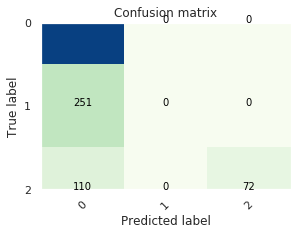

In [168]:
#Visualize the 'Confusion Matrix' 

import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.grid(False)

# call pre defined function
plot_confusion_matrix(cnf_matrix, classes=range(3))

In [169]:
#Classification Report of each class group

from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.71      1.00      0.83       875
     Class 1       0.00      0.00      0.00       251
     Class 2       1.00      0.40      0.57       182

    accuracy                           0.72      1308
   macro avg       0.57      0.47      0.47      1308
weighted avg       0.61      0.72      0.63      1308



In [170]:
result.rdd.take(2)

[Row(label=0.0, features=SparseVector(4374, {38: 1.0, 4371: 63.0, 4372: 2.0, 4373: 1272.48}), CustomerID='12394', Recency=63, Frequency=2, Monetary=1272.48, kpred=0, rawPrediction=DenseVector([7.0459, -3.472, -3.5739]), probability=DenseVector([0.9999, 0.0, 0.0]), prediction=0.0),
 Row(label=0.0, features=SparseVector(4374, {1876: 1.0, 4371: 79.0, 4372: 1.0, 4373: 1862.0}), CustomerID='14887', Recency=79, Frequency=1, Monetary=1862.0, kpred=0, rawPrediction=DenseVector([6.4849, -3.3126, -3.1724]), probability=DenseVector([0.9999, 0.0001, 0.0001]), prediction=0.0)]

In [171]:
#confusion metrix
result.rdd.map(tuple).take(2)

[(0.0,
  SparseVector(4374, {38: 1.0, 4371: 63.0, 4372: 2.0, 4373: 1272.48}),
  '12394',
  63,
  2,
  1272.48,
  0,
  DenseVector([7.0459, -3.472, -3.5739]),
  DenseVector([0.9999, 0.0, 0.0]),
  0.0),
 (0.0,
  SparseVector(4374, {1876: 1.0, 4371: 79.0, 4372: 1.0, 4373: 1862.0}),
  '14887',
  79,
  1,
  1862.0,
  0,
  DenseVector([6.4849, -3.3126, -3.1724]),
  DenseVector([0.9999, 0.0001, 0.0001]),
  0.0)]

In [172]:
labelandprediction = result.select("prediction", "label")
metrics = MulticlassMetrics(labelandprediction.rdd.map(tuple))

precision = metrics.precision(0)
recall = metrics.recall(0)
print("Precision = %s" % precision)
print("Recall = %s" % recall)

Precision = 0.7079288025889967
Recall = 1.0


In [173]:
metrics.confusionMatrix().toArray().transpose()

array([[875., 251., 110.],
       [  0.,   0.,   0.],
       [  0.,   0.,  72.]])

In [174]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [175]:
dtcparamGrid = (ParamGridBuilder()
             .addGrid(dtc.maxDepth, [2, 5, 10, 20, 30])
             .addGrid(dtc.maxBins, [10, 20, 40, 80, 100])
             .build())

In [176]:
dtccv = CrossValidator(estimator = dtc,
                      estimatorParamMaps = dtcparamGrid,
                      evaluator = evaluator,
                      numFolds = 5)

In [177]:
dtcModel = dtccv.fit(train_data)

In [178]:
predictions=dtcModel.transform(test_data)

In [179]:
predictions_lp = predictions.select("CustomerID", "label", "prediction").show()

+----------+-----+----------+
|CustomerID|label|prediction|
+----------+-----+----------+
|     12394|  0.0|       0.0|
|     14887|  0.0|       0.0|
|     15555|  0.0|       0.0|
|     15634|  0.0|       0.0|
|     17686|  0.0|       0.0|
|     15574|  1.0|       1.0|
|     12637|  0.0|       0.0|
|     14974|  0.0|       0.0|
|     16639|  0.0|       0.0|
|     13187|  2.0|       2.0|
|     17551|  2.0|       2.0|
|     16303|  0.0|       0.0|
|     17901|  0.0|       0.0|
|     18276|  0.0|       0.0|
|     12750|  1.0|       1.0|
|     13395|  1.0|       1.0|
|     15041|  1.0|       1.0|
|     16340|  1.0|       1.0|
|     12811|  2.0|       2.0|
|     13805|  0.0|       0.0|
+----------+-----+----------+
only showing top 20 rows



In [180]:
predictions_lp = predictions.select("CustomerID", "prediction").show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     12394|       0.0|
|     14887|       0.0|
|     15555|       0.0|
|     15634|       0.0|
|     17686|       0.0|
|     15574|       1.0|
|     12637|       0.0|
|     14974|       0.0|
|     16639|       0.0|
|     13187|       2.0|
|     17551|       2.0|
|     16303|       0.0|
|     17901|       0.0|
|     18276|       0.0|
|     12750|       1.0|
|     13395|       1.0|
|     15041|       1.0|
|     16340|       1.0|
|     12811|       2.0|
|     13805|       0.0|
+----------+----------+
only showing top 20 rows



In [181]:
dtcevaluator = MulticlassClassificationEvaluator(predictionCol="prediction")

In [182]:
Accuracy =dtcevaluator.evaluate(predictions)

In [183]:
Accuracy

0.9930858457498121

In [184]:
predictions.groupBy("label", "prediction").count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|  242|
|  2.0|       2.0|  182|
|  1.0|       0.0|    4|
|  1.0|       2.0|    5|
|  0.0|       0.0|  875|
+-----+----------+-----+



In [185]:
customercvd_0 =predictions.filter(predictions['prediction']==0).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     12394|       0.0|
|     14887|       0.0|
|     15555|       0.0|
|     15634|       0.0|
|     17686|       0.0|
|     12637|       0.0|
|     14974|       0.0|
|     16639|       0.0|
|     16303|       0.0|
|     17901|       0.0|
|     18276|       0.0|
|     13805|       0.0|
|     14649|       0.0|
|     15277|       0.0|
|     15433|       0.0|
|     17584|       0.0|
|     13429|       0.0|
|     13700|       0.0|
|     15553|       0.0|
|     16133|       0.0|
+----------+----------+
only showing top 20 rows



In [186]:
customercvd_1 = predictions.filter(predictions['prediction']==1).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     15574|       1.0|
|     12750|       1.0|
|     13395|       1.0|
|     15041|       1.0|
|     16340|       1.0|
|     14340|       1.0|
|     17375|       1.0|
|     12643|       1.0|
|     15412|       1.0|
|     16503|       1.0|
|     15895|       1.0|
|     17900|       1.0|
|     13937|       1.0|
|     13952|       1.0|
|     15802|       1.0|
|     18248|       1.0|
|     13821|       1.0|
|     14722|       1.0|
|     13833|       1.0|
|     16756|       1.0|
+----------+----------+
only showing top 20 rows



In [187]:
customercvd_2 = predictions.filter(predictions['prediction']==2).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     13187|       2.0|
|     17551|       2.0|
|     12811|       2.0|
|     18106|       2.0|
|     12386|       2.0|
|     15107|       2.0|
|     17507|       2.0|
|     13512|       2.0|
|     14114|       2.0|
|     17946|       2.0|
|     13065|       2.0|
|     17303|       2.0|
|     16097|       2.0|
|     14090|       2.0|
|     15047|       2.0|
|     15388|       2.0|
|     15353|       2.0|
|     14476|       2.0|
|     17535|       2.0|
|     17976|       2.0|
+----------+----------+
only showing top 20 rows



In [188]:
print('F1-Score ', dtcevaluator.evaluate(predictions, 
                                      {evaluator.metricName: 'f1'}))
print('Precision ', dtcevaluator.evaluate(predictions,
                                       {evaluator.metricName: 'weightedPrecision'}))
print('Recall ', dtcevaluator.evaluate(predictions, 
                                    {evaluator.metricName: 'weightedRecall'}))
print('Accuracy ', dtcevaluator.evaluate(predictions, 
                                      {evaluator.metricName: 'accuracy'}))

F1-Score  0.9930858457498121
Precision  0.9930858457498121
Recall  0.9930858457498121
Accuracy  0.9930858457498121


In [189]:
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [190]:
#Convert Spark-DataFrame to Pnadas-DataFrame
#Call Confusion Matrix With 'True' and 'Predicted' Label

from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas() # convert to pandas dataframe from spark dataframe

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas() # convert to pandas dataframe from spark dataframe

cnf_matrix = confusion_matrix(y_true, y_pred,labels=range(3))

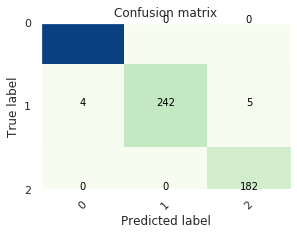

In [191]:
#Visualize the 'Confusion Matrix' 

import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.grid(False)

# call pre defined function
plot_confusion_matrix(cnf_matrix, classes=range(3))

In [192]:
#Classification Report of each class group

from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       875
     Class 1       1.00      0.96      0.98       251
     Class 2       0.97      1.00      0.99       182

    accuracy                           0.99      1308
   macro avg       0.99      0.99      0.99      1308
weighted avg       0.99      0.99      0.99      1308



In [193]:
labelandprediction = predictions.select("prediction", "label")
metrics_tdccv = MulticlassMetrics(labelandprediction.rdd.map(tuple))

precision = metrics_tdccv.precision(0)
recall = metrics_tdccv.recall(0)
print("Precision = %s" % precision)
print("Recall = %s" % recall)

Precision = 0.9954493742889647
Recall = 1.0


In [194]:
metrics_tdccv.confusionMatrix().toArray().transpose()

array([[875.,   4.,   0.],
       [  0., 242.,   0.],
       [  0.,   5., 182.]])

In [195]:
# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [50, 100, 200]) # number of trees
             .addGrid(rf.maxDepth, [3, 4, 5]) # maximum depth
#            .addGrid(rf.maxBins, [24, 32, 40]) #Number of bins
             .build())

In [196]:
# Create 5-fold CrossValidator
cv_rf = CrossValidator(estimator=rf, \
                    estimatorParamMaps=paramGrid, \
                    evaluator=evaluator, \
                    numFolds=5)

In [197]:
# Run cross validations
cvrfModel = cv_rf.fit(train_data)

In [198]:
# Use test set here so we can measure the accuracy of our model on new data
predictions = cvrfModel.transform(test_data)

In [199]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")

In [200]:
Accuracy =evaluator.evaluate(predictions)

In [201]:
Accuracy

0.5362713825627836

In [202]:
predictions.groupBy('label','prediction').count()

DataFrame[label: double, prediction: double, count: bigint]

In [203]:
Customercvr_0 =predictions.filter(predictions['prediction']==0).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     12394|       0.0|
|     14887|       0.0|
|     15555|       0.0|
|     15634|       0.0|
|     17686|       0.0|
|     15574|       0.0|
|     12637|       0.0|
|     14974|       0.0|
|     16639|       0.0|
|     13187|       0.0|
|     17551|       0.0|
|     16303|       0.0|
|     17901|       0.0|
|     18276|       0.0|
|     12750|       0.0|
|     13395|       0.0|
|     15041|       0.0|
|     16340|       0.0|
|     12811|       0.0|
|     13805|       0.0|
+----------+----------+
only showing top 20 rows



In [204]:
customercvr_1 =predictions.filter(predictions['prediction']==1).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
+----------+----------+



In [205]:
customercvr_2 =predictions.filter(predictions['prediction']==2).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
+----------+----------+



In [206]:
print('F1-Score ', evaluator.evaluate(predictions, 
                                      {evaluator.metricName: 'f1'}))
print('Precision ', evaluator.evaluate(predictions,
                                       {evaluator.metricName: 'weightedPrecision'}))
print('Recall ', evaluator.evaluate(predictions, 
                                    {evaluator.metricName: 'weightedRecall'}))
print('Accuracy ', evaluator.evaluate(predictions, 
                                      {evaluator.metricName: 'accuracy'}))

F1-Score  0.5362713825627836
Precision  0.4475078089199376
Recall  0.668960244648318
Accuracy  0.668960244648318


In [207]:
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [208]:
#Convert Spark-DataFrame to Pnadas-DataFrame
#Call Confusion Matrix With 'True' and 'Predicted' Label

from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas() # convert to pandas dataframe from spark dataframe

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas() # convert to pandas dataframe from spark dataframe

cnf_matrix = confusion_matrix(y_true, y_pred,labels=range(3))

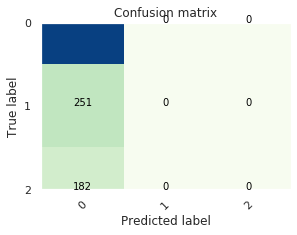

In [209]:
#Visualize the 'Confusion Matrix' 

import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.grid(False)

# call pre defined function
plot_confusion_matrix(cnf_matrix, classes=range(3))

In [210]:
#Classification Report of each class group

from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.67      1.00      0.80       875
     Class 1       0.00      0.00      0.00       251
     Class 2       0.00      0.00      0.00       182

    accuracy                           0.67      1308
   macro avg       0.22      0.33      0.27      1308
weighted avg       0.45      0.67      0.54      1308



In [211]:
labelandprediction = predictions.select("prediction", "label")
metrics_rfcv = MulticlassMetrics(labelandprediction.rdd.map(tuple))

precision = metrics_rfcv.precision(0)
recall = metrics_rfcv.recall(0)
print("Precision = %s" % precision)
print("Recall = %s" % recall)

Precision = 0.668960244648318
Recall = 1.0


In [212]:
metrics_rfcv.confusionMatrix().toArray().transpose()

array([[875., 251., 182.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.]])

In [213]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [214]:
paramGrid = (ParamGridBuilder()
             .addGrid(log_reg.regParam, [0.1, 0.3, 0.5]) # regularization parameter
             .addGrid(log_reg.elasticNetParam, [0.0, 0.1, 0.2]) # Elastic Net Parameter (Ridge = 0)
#            .addGrid(model.maxIter, [10, 20, 50]) #Number of iterations
#            .addGrid(idf.numFeatures, [10, 100, 1000]) # Number of features
             .build())

In [215]:
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=log_reg, \
                    estimatorParamMaps=paramGrid, \
                    evaluator=evaluator, \
                    numFolds=5)

In [216]:
cvModel = cv.fit(train_data)

In [217]:
predictions = cvModel.transform(test_data)

In [218]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")

In [219]:
Accuracy = evaluator.evaluate(predictions)

In [220]:
Accuracy

0.8018042272844351

In [221]:
predictions.groupBy('label','prediction').count()

DataFrame[label: double, prediction: double, count: bigint]

In [222]:
Customercvlg_0 =predictions.filter(predictions['prediction']==0).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     12394|       0.0|
|     14887|       0.0|
|     15555|       0.0|
|     15634|       0.0|
|     17686|       0.0|
|     15574|       0.0|
|     12637|       0.0|
|     14974|       0.0|
|     16639|       0.0|
|     16303|       0.0|
|     17901|       0.0|
|     18276|       0.0|
|     12750|       0.0|
|     15041|       0.0|
|     16340|       0.0|
|     13805|       0.0|
|     14649|       0.0|
|     15277|       0.0|
|     15433|       0.0|
|     17584|       0.0|
+----------+----------+
only showing top 20 rows



In [223]:
Customercvlg_1 =predictions.filter(predictions['prediction']==1).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     13395|       1.0|
|     17375|       1.0|
|     13952|       1.0|
|     14241|       1.0|
|     13531|       1.0|
|     17176|       1.0|
|     14705|       1.0|
|     14280|       1.0|
|     17472|       1.0|
|     15918|       1.0|
|     15780|       1.0|
|     13070|       1.0|
|     14740|       1.0|
|     13887|       1.0|
|     16659|       1.0|
|     13223|       1.0|
|     13900|       1.0|
|     17455|       1.0|
|     16230|       1.0|
|     17578|       1.0|
+----------+----------+
only showing top 20 rows



In [224]:
Customercvlg_2 =predictions.filter(predictions['prediction']==2).select(['CustomerID','prediction']).show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     13187|       2.0|
|     17551|       2.0|
|     12811|       2.0|
|     14340|       2.0|
|     18106|       2.0|
|     12386|       2.0|
|     15107|       2.0|
|     17507|       2.0|
|     13512|       2.0|
|     14114|       2.0|
|     17946|       2.0|
|     13065|       2.0|
|     17303|       2.0|
|     16097|       2.0|
|     14090|       2.0|
|     15047|       2.0|
|     15388|       2.0|
|     16756|       2.0|
|     15353|       2.0|
|     14476|       2.0|
+----------+----------+
only showing top 20 rows



In [225]:
print('F1-Score ', evaluator.evaluate(predictions, 
                                      {evaluator.metricName: 'f1'}))
print('Precision ', evaluator.evaluate(predictions,
                                       {evaluator.metricName: 'weightedPrecision'}))
print('Recall ', evaluator.evaluate(predictions, 
                                    {evaluator.metricName: 'weightedRecall'}))
print('Accuracy ', evaluator.evaluate(predictions, 
                                      {evaluator.metricName: 'accuracy'}))

F1-Score  0.8018042272844351
Precision  0.8712358828408295
Recall  0.8463302752293578
Accuracy  0.8463302752293578


In [226]:
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [227]:
#Convert Spark-DataFrame to Pnadas-DataFrame
#Call Confusion Matrix With 'True' and 'Predicted' Label

from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas() # convert to pandas dataframe from spark dataframe

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas() # convert to pandas dataframe from spark dataframe

cnf_matrix = confusion_matrix(y_true, y_pred,labels=range(3))

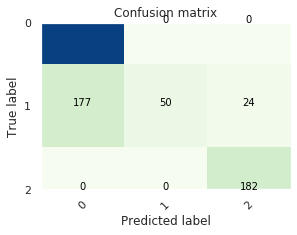

In [228]:
#Visualize the 'Confusion Matrix' 

import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.grid(False)

# call pre defined function
plot_confusion_matrix(cnf_matrix, classes=range(3))

In [229]:
#Classification Report of each class group

from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      1.00      0.91       875
     Class 1       1.00      0.20      0.33       251
     Class 2       0.88      1.00      0.94       182

    accuracy                           0.85      1308
   macro avg       0.91      0.73      0.73      1308
weighted avg       0.87      0.85      0.80      1308



In [230]:
labelandprediction = predictions.select("prediction", "label")
metrics_lrcv = MulticlassMetrics(labelandprediction.rdd.map(tuple))

precision = metrics_lrcv.precision(0)
recall = metrics_lrcv.recall(0)
print("Precision = %s" % precision)
print("Recall = %s" % recall)

Precision = 0.8317490494296578
Recall = 1.0


In [231]:
metrics_lrcv.confusionMatrix().toArray().transpose()

array([[875., 177.,   0.],
       [  0.,  50.,   0.],
       [  0.,  24., 182.]])